In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [47]:
data = pd.read_csv('data\\project\\wave1_imm_dummies.csv', header=0, na_values=' ', index_col=0)

In [48]:
data.head()

,H1GI20,H1DA8,H1DA9,H1DA10,H1GH1,H1GH28,H1GH42,H1GH44,H1GH46,H1GH59A,...,BST90P13_3,BST90P24_1,BST90P24_2,BST90P24_3,BST90P24_4,BST90P24_5,BST90P24_6,BST90P26_1,BST90P26_2,BST90P26_3
AID,,,,,,,,,,,,,,,,,,,,,
57101310,11,33,4.0,0,4,5,4,5,5,6,...,0,0,0,0,0,0,1,0,0,1
57109625,8,14,7.0,3,1,2,2,4,4,5,...,0,0,1,0,0,0,0,0,0,1
57111071,8,35,12.0,2,2,4,3,3,3,5,...,0,0,1,0,0,0,0,0,0,1
57113943,9,10,5.0,4,3,4,3,4,5,6,...,1,0,1,0,0,0,0,1,0,0
57117542,9,0,0.0,0,2,3,4,4,4,6,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#for col in data.columns:
#    if "BST" in col:
#        data.drop(col, axis=1, inplace=True)

In [50]:
data.C_CRP.value_counts()

3.0    1870
1.0    1371
2.0    1298
Name: C_CRP, dtype: int64

In [51]:
data.ix[data.C_CRP == 2, 'C_CRP'] = 1

In [52]:
data.C_CRP.value_counts()

1.0    2669
3.0    1870
Name: C_CRP, dtype: int64

In [53]:
target = data["C_CRP"]

In [54]:
target.head()

AID
57101310    3.0
57109625    1.0
57111071    1.0
57113943    3.0
57117542    3.0
Name: C_CRP, dtype: float64

In [55]:
data.drop("C_CRP", axis=1, inplace=True)

In [56]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [57]:
data_train.shape

(3631, 498)

In [58]:
data_test.shape

(908, 498)

In [59]:
target_train.shape

(3631,)

In [60]:
target_test.shape

(908,)

In [61]:
target_train.value_counts()

1.0    2133
3.0    1498
Name: C_CRP, dtype: int64

In [62]:
target_test.value_counts()

1.0    536
3.0    372
Name: C_CRP, dtype: int64

In [63]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data_train)
train_norm = min_max_scaler.fit_transform(data_train)

min_max_scaler = preprocessing.MinMaxScaler().fit(data_test)
test_norm = min_max_scaler.fit_transform(data_test)

In [64]:
target_train = np.array(target_train)
target_test = np.array(target_test)

             precision    recall  f1-score   support

        1.0       0.60      0.63      0.62       536
        3.0       0.43      0.41      0.42       372

avg / total       0.53      0.54      0.54       908

Accuracy: 0.54


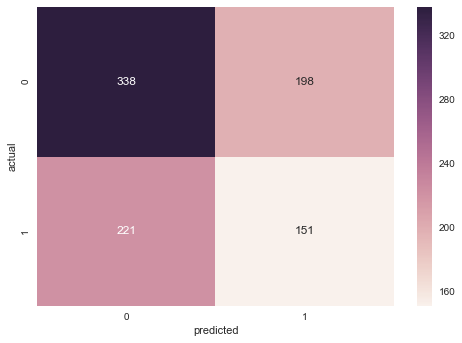

In [65]:
data_knn = KNeighborsClassifier(n_neighbors = 1, weights='distance', metric='euclidean', n_jobs=-1)
data_knn.fit(train_norm, target_train)
target_predict = data_knn.predict(test_norm)

print(classification_report(target_test, target_predict))

knn_confusion_matrix = confusion_matrix(y_true = target_test, y_pred = target_predict)
print("Accuracy: %0.2f" % data_knn.score(test_norm, target_test))

ax = sns.heatmap(knn_confusion_matrix, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')
plt.show()

In [66]:
df_find_k = pd.DataFrame(columns=['accuracy', 'recall_class_0', 'recall_class_1', 'recall_avg_over_total'])

for k in range(1,101):
        data_knn = KNeighborsClassifier(n_neighbors = k, weights='distance', metric='euclidean', n_jobs=-1)
        data_knn.fit(train_norm, target_train)
        target_predict = data_knn.predict(test_norm)
        
        recall = recall_score(target_test, target_predict, average=None)
        df_find_k.loc[k] = [data_knn.score(test_norm, target_test), recall[0], recall[1], recall_score(target_test, target_predict, average='micro')]

In [67]:
df_find_k.head()

,accuracy,recall_class_0,recall_class_1,recall_avg_over_total
1,0.538546,0.630597,0.405914,0.538546
2,0.538546,0.630597,0.405914,0.538546
3,0.563877,0.701493,0.365591,0.563877
4,0.556167,0.679104,0.379032,0.556167
5,0.569383,0.722015,0.349462,0.569383


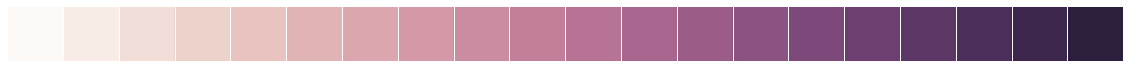

In [68]:
sns.palplot(sns.cubehelix_palette(20, light=.98))
plt.show()

In [69]:
pal = sns.cubehelix_palette(20, light=.98)
pal = pal.as_hex()
pal[0]

'#fcf9f7'

In [70]:
sns.set(rc={'axes.facecolor':pal[0]})

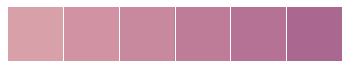

In [71]:
sns.palplot(sns.cubehelix_palette(6, dark=.50, light=.70))
plt.show()

In [72]:
cmap = (sns.cubehelix_palette(6, dark=.50, light=.70, as_cmap=True))

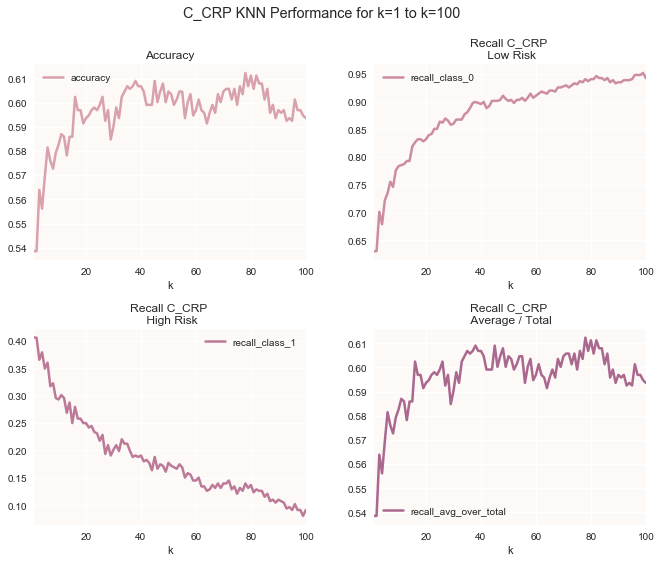

In [73]:
figure = plt.figure()
df_find_k.plot(subplots=True, layout=(2, 2), figsize=(10, 8),  sharex=False, title='C_CRP KNN Performance for k=1 to k=100', linewidth=2.5, colormap=cmap)
plt.subplot(221)
plt.xlabel('k')
plt.title('Accuracy')
plt.subplot(222)
plt.xlabel('k')
plt.title('Recall C_CRP \n Low Risk')
plt.subplot(223)
plt.xlabel('k')
plt.title('Recall C_CRP \n High Risk')
plt.subplot(224)
plt.xlabel('k')
plt.title('Recall C_CRP \n Average / Total')
plt.subplots_adjust(top=0.88, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.25)
plt.savefig('ccrp_k_1_to_100.png', dpi=300)
plt.show()

In [74]:
df_find_k = pd.DataFrame(columns=['accuracy', 'recall_class_0', 'recall_class_1', 'recall_avg_over_total'])

for k in range(15,46):
        data_knn = KNeighborsClassifier(n_neighbors = k, weights='distance', metric='euclidean', n_jobs=-1)
        data_knn.fit(train_norm, target_train)
        target_predict = data_knn.predict(test_norm)
        
        recall = recall_score(target_test, target_predict, average=None)
        df_find_k.loc[k] = [data_knn.score(test_norm, target_test), recall[0], recall[1], recall_score(target_test, target_predict, average='micro')]

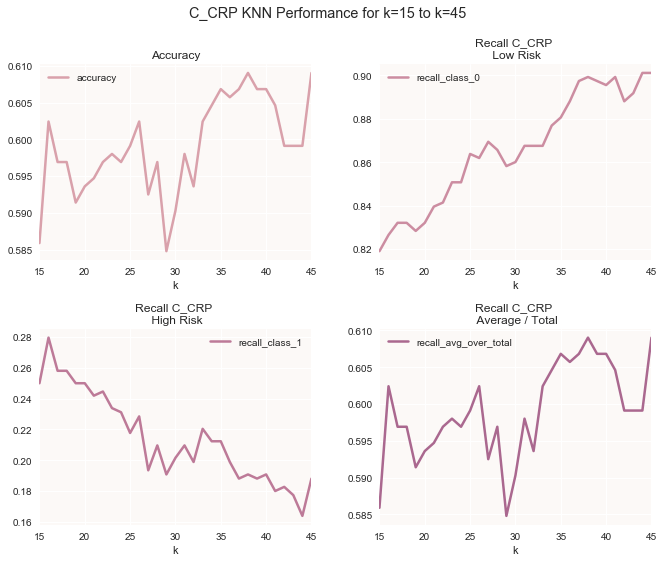

In [75]:
figure = plt.figure()
df_find_k.plot(subplots=True, layout=(2, 2), figsize=(10, 8),  sharex=False, title='C_CRP KNN Performance for k=15 to k=45', linewidth=2.5, colormap=cmap)
plt.subplot(221)
plt.xlabel('k')
plt.title('Accuracy')
plt.subplot(222)
plt.xlabel('k')
plt.title('Recall C_CRP \n Low Risk')
plt.subplot(223)
plt.xlabel('k')
plt.title('Recall C_CRP \n High Risk')
plt.subplot(224)
plt.xlabel('k')
plt.title('Recall C_CRP \n Average / Total')
plt.subplots_adjust(top=0.88, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.25)
plt.savefig('ccrp_k_15_to_45.png', dpi=300)
plt.show()

             precision    recall  f1-score   support

        1.0       0.62      0.83      0.71       536
        3.0       0.53      0.28      0.37       372

avg / total       0.58      0.60      0.57       908

Accuracy: 0.60


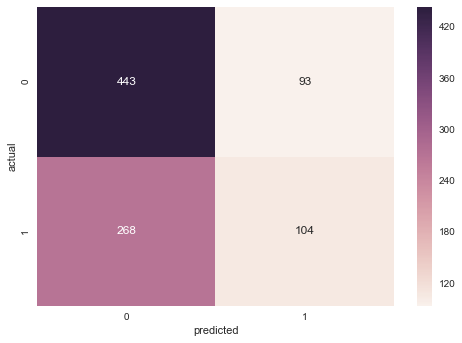

In [21]:
data_knn = KNeighborsClassifier(n_neighbors = 16, weights='distance', metric='euclidean', n_jobs=-1)
data_knn.fit(train_norm, target_train)
target_predict = data_knn.predict(test_norm)

print(classification_report(target_test, target_predict))

knn_confusion_matrix = confusion_matrix(y_true = target_test, y_pred = target_predict)
print("Accuracy: %0.2f" % data_knn.score(test_norm, target_test))

ax = sns.heatmap(knn_confusion_matrix, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')
plt.show()

             precision    recall  f1-score   support

        1.0       0.62      0.87      0.72       536
        3.0       0.54      0.22      0.31       372

avg / total       0.58      0.60      0.55       908

Accuracy: 0.60


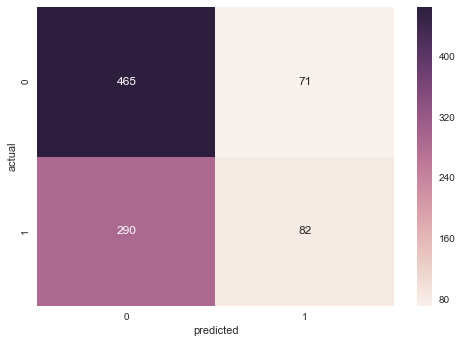

In [22]:
data_knn = KNeighborsClassifier(n_neighbors = 33, weights='distance', metric='euclidean', n_jobs=-1)
data_knn.fit(train_norm, target_train)
target_predict = data_knn.predict(test_norm)

print(classification_report(target_test, target_predict))

knn_confusion_matrix = confusion_matrix(y_true = target_test, y_pred = target_predict)
print("Accuracy: %0.2f" % data_knn.score(test_norm, target_test))

ax = sns.heatmap(knn_confusion_matrix, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')
plt.show()

In [23]:
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_norm = min_max_scaler.fit_transform(data)

In [34]:
data_knn = KNeighborsClassifier(n_neighbors = 16, weights='distance', metric='euclidean', n_jobs=-1)

In [35]:
predicted = cross_val_predict(data_knn, data_norm, target, cv=10)
classification_report = classification_report(target, predicted)
knn_confusion_matrix = confusion_matrix(y_true = target, y_pred = predicted)
scores = cross_val_score(data_knn, data_norm, target, cv=10)

             precision    recall  f1-score   support

        1.0       0.61      0.82      0.70      2669
        3.0       0.50      0.26      0.34      1870

avg / total       0.57      0.59      0.55      4539

Accuracy: 0.59 (+/- 0.02)


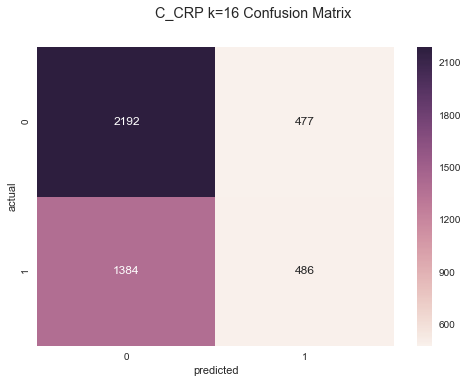

In [36]:
print(classification_report)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
ax = sns.heatmap(knn_confusion_matrix, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')
plt.suptitle('C_CRP k=16 Confusion Matrix')
plt.savefig('ccrp_k16_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
data_knn = KNeighborsClassifier(n_neighbors = 33, weights='distance', metric='euclidean', n_jobs=-1)

In [25]:
predicted = cross_val_predict(data_knn, data_norm, target, cv=10)
classification_report = classification_report(target, predicted)
knn_confusion_matrix = confusion_matrix(y_true = target, y_pred = predicted)
scores = cross_val_score(data_knn, data_norm, target, cv=10)

             precision    recall  f1-score   support

        1.0       0.61      0.88      0.72      2669
        3.0       0.55      0.21      0.30      1870

avg / total       0.59      0.60      0.55      4539

Accuracy: 0.60 (+/- 0.04)


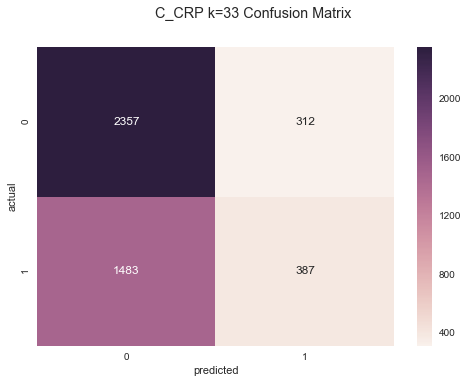

In [26]:
print(classification_report)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
ax = sns.heatmap(knn_confusion_matrix, annot=True, fmt="d")
ax.set(xlabel='predicted', ylabel='actual')
plt.suptitle('C_CRP k=33 Confusion Matrix')
plt.savefig('ccrp_k33_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()